# Final Project Big Ideas

### What is the best Neightborhood in Pittsburgh to be homeless in?

In [2]:
import pandas as pd
import geopandas as geo
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = {
    'id': [2, 4, 5, 6, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'neighborhood': ['31st ward', 'Allegheny Center', 'Allegheny West', 'Allentown', 'Arlington',
                      'Banksville-Greentree', 'Beechview', 'Beltzhoover', 'Bloomfield', 'Bon Air',
                      'Brighton Heights', 'Brookline', 'Carrick', 'Central North Side', 'Chartiers City',
                      'City View', 'Crafton Heights', 'Downtown', 'Duquesne Heights', 'East Hills'],
    'number_major_crimes_1973': [125, 277, 154, 117, 243, 145, 221, 293, 486, 36, 157, 354, 275, 541, 18, 24, 71, 1458, 48, 66],
    'neighborhood_crime_rate_1973': [0.017, 0.151, 0.147, 0.026, 0.037, 0.023, 0.018, 0.054, 0.038, 0.026, 0.015, 0.018, 0.018, 0.098, 0.015, 0.032, 0.013, 0.469, 0.018, 0.036],
    'number_major_crimes_1974': [85, 407, 197, 80, 177, 151, 220, 263, 492, 40, 161, 397, 266, 591, 20, 20, 66, 1942, 61, 109],
    'neighborhood_crime_rate_1974': [0.012, 0.222, 0.188, 0.018, 0.027, 0.024, 0.018, 0.049, 0.039, 0.029, 0.016, 0.02, 0.017, 0.107, 0.017, 0.027, 0.012, 0.625, 0.023, 0.06],
    'number_major_crimes_1975': [92, 571, 227, 114, 184, 133, 244, 241, 656, 28, 155, 319, 287, 585, 20, 15, 69, 2683, 86, 131],
    'neighborhood_crime_rate_1975': [0.013, 0.312, 0.217, 0.025, 0.028, 0.021, 0.02, 0.045, 0.052, 0.02, 0.015, 0.016, 0.019, 0.106, 0.017, 0.02, 0.012, 0.864, 0.032, 0.072]
}

# DataFrame
df = pd.DataFrame(data)

# Calculate the average crime rate for each neighborhood
df['average_crime_rate'] = df[['neighborhood_crime_rate_1973', 'neighborhood_crime_rate_1974', 'neighborhood_crime_rate_1975']].mean(axis=1)

# Rank neighborhoods based on average crime rate
ranked_df = df.sort_values(by='average_crime_rate')

# Display the result
print(ranked_df[['neighborhood', 'average_crime_rate']])

            neighborhood  average_crime_rate
16       Crafton Heights            0.012333
0              31st ward            0.014000
10      Brighton Heights            0.015333
14        Chartiers City            0.016333
11             Brookline            0.018000
12               Carrick            0.018000
6              Beechview            0.018667
5   Banksville-Greentree            0.022667
3              Allentown            0.023000
18      Duquesne Heights            0.024333
9                Bon Air            0.025000
15             City View            0.026333
4              Arlington            0.030667
8             Bloomfield            0.043000
7            Beltzhoover            0.049333
19            East Hills            0.056000
13    Central North Side            0.103667
2         Allegheny West            0.184000
1       Allegheny Center            0.228333
17              Downtown            0.652667


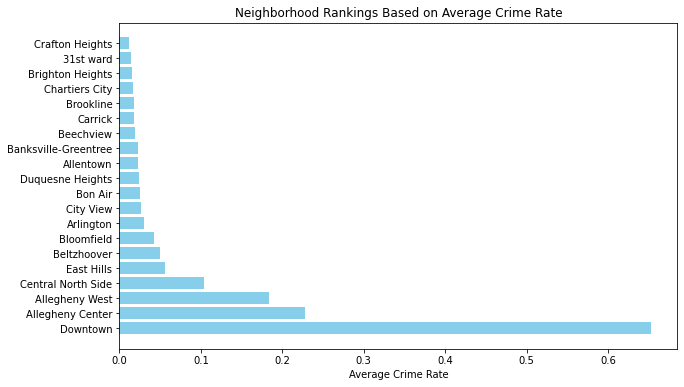

In [4]:
plt.figure(figsize=(10, 6))
plt.barh(ranked_df['neighborhood'], ranked_df['average_crime_rate'], color='skyblue')
plt.xlabel('Average Crime Rate')
plt.title('Neighborhood Rankings Based on Average Crime Rate')
plt.gca().invert_yaxis()  # Invert y-axis to display the lowest crime rate at the top
plt.show()

In [24]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
newDf.head(53)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Margin of Error; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Margin of Error; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more","Margin of Error; Total: - $2,000,000 or more"
1,Allegheny West,2,69.0,31.000000,4.0,7.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,11.0,17.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,538.0,112.769677,45.0,33.734256,19.0,21.118712,22.0,26.153394,...,6.0,16.763055,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
3,Arlington,4,492.0,84.433406,12.0,16.186414,29.0,27.513633,5.0,16.248077,...,7.0,17.916473,0.0,17.320508,3.0,15.779734,0.0,17.320508,0.0,17.320508
5,Banksville,6,985.0,139.728308,26.0,35.510562,0.0,20.000000,0.0,20.000000,...,0.0,20.000000,0.0,20.000000,17.0,31.240999,0.0,20.000000,0.0,20.000000
6,Bedford Dwellings,7,48.0,31.000000,4.0,6.000000,5.0,7.000000,8.0,11.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
8,Beltzhoover,9,556.0,129.988461,4.0,18.330303,19.0,25.495098,45.0,42.261093,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000
9,Bloomfield,10,1688.0,134.014925,5.0,30.805844,23.0,35.791060,5.0,31.048349,...,26.0,36.207734,3.0,30.413813,4.0,31.048349,0.0,31.622777,0.0,31.622777
11,Bon Air,12,305.0,62.000000,2.0,4.000000,7.0,11.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
12,Brighton Heights,13,2206.0,159.125736,14.0,33.600595,6.0,25.768197,0.0,26.457513,...,0.0,26.457513,18.0,29.478806,0.0,26.457513,0.0,26.457513,0.0,26.457513
13,Brookline,14,4245.0,300.141633,47.0,50.259327,47.0,49.689033,6.0,38.483763,...,10.0,41.521079,23.0,53.329167,0.0,38.729833,0.0,38.729833,8.0,39.293765


In [1]:
import pandas as pd

file_path = "https://data.wprdc.org/dataset/9c7da6cf-7492-4ffc-865d-10945a37232a/resource/967cad5c-ea8f-4558-9dc9-8d3f7a3b046c/download/crime-rate.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df = df.dropna() # Drop rows with missing values
df.head(100) 

,neighborhood,number_major_crimes_1973,neighborhood_crime_rate_1973,number_major_crimes_1974,neighborhood_crime_rate_1974,number_major_crimes_1975,neighborhood_crime_rate_1975
0,Westwood,65,0.019,46,0.014,78,0.023
1,31st ward,125,0.017,85,0.012,92,0.013
2,Arlington,243,0.037,177,0.027,184,0.028
3,Allegheny Center,277,0.151,407,0.222,571,0.312
4,Allegheny West,154,0.147,197,0.188,227,0.217
...,...,...,...,...,...,...,...
64,Swisshelm Heights,18,0.009,14,0.007,16,0.008
65,Troy Hill,75,0.019,55,0.014,61,0.016
66,Uptown,323,0.099,382,0.117,409,0.126
67,West End,70,0.049,70,0.049,60,0.040


In [2]:
import pandas as pd
import pandas as pd

file_path = "https://data.wprdc.org/dataset/9c7da6cf-7492-4ffc-865d-10945a37232a/resource/967cad5c-ea8f-4558-9dc9-8d3f7a3b046c/download/crime-rate.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1') #DataFrame

df = df.dropna()

df['average_crime_rate'] = df[['neighborhood_crime_rate_1973', 'neighborhood_crime_rate_1974', 'neighborhood_crime_rate_1975']].mean(axis=1)
ranked_df = df.sort_values(by='average_crime_rate')

print(ranked_df[['neighborhood', 'average_crime_rate']])

                    neighborhood  average_crime_rate
31            Glen Hazel Heights            0.000000
64             Swisshelm Heights            0.008000
35         Ivory Avenue District            0.009000
50                       Oakwood            0.012333
17               Crafton Heights            0.012333
..                           ...                 ...
4                 Allegheny West            0.184000
3               Allegheny Center            0.228333
63                Strip District            0.504000
18                      Downtown            0.652667
44  North Side: North Shore Area            0.692333

[69 rows x 2 columns]


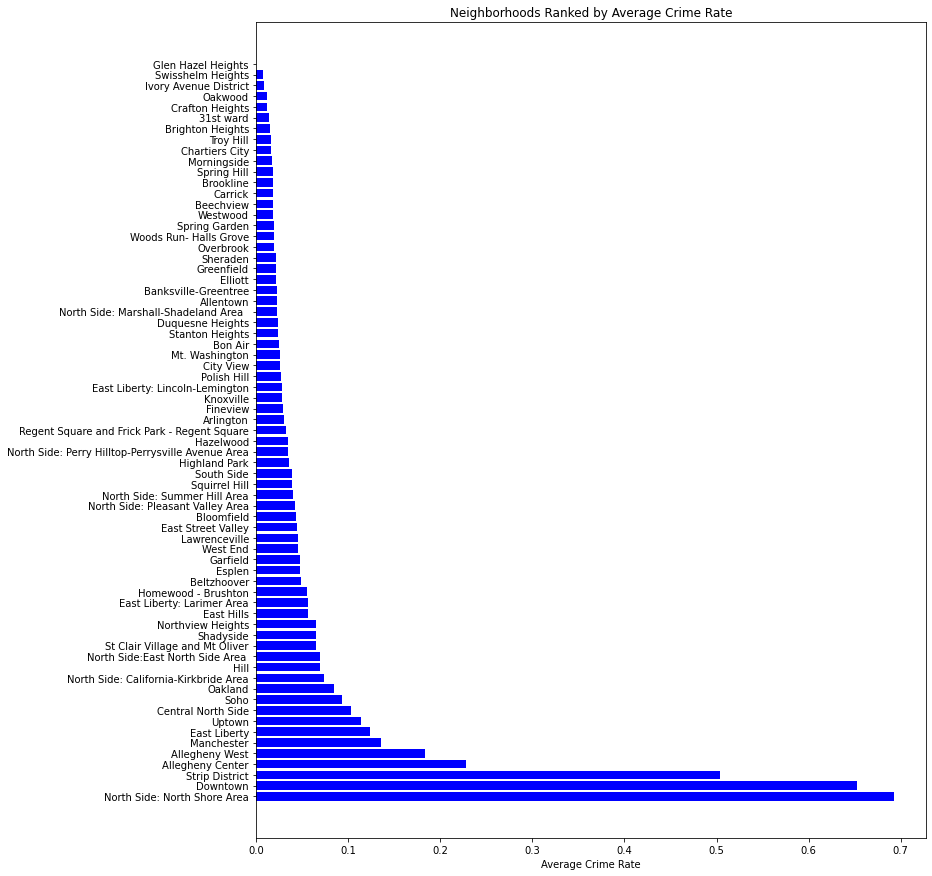

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 15))
plt.barh(ranked_df['neighborhood'], ranked_df['average_crime_rate'], color='blue')
plt.xlabel('Average Crime Rate')
plt.title('Neighborhoods Ranked by Average Crime Rate')
plt.gca().invert_yaxis()
plt.show()